In [1]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# reshape the data a little bit
train_X = train_X.reshape(60000, 784)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
import matplotlib
import matplotlib.pyplot as plt

def print_figure (X, num) :
    plt.imshow(X[num], cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [3]:
from sklearn.decomposition import PCA

rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_red = rnd_pca.fit_transform(train_X)          
          
print(X_red.shape)

(60000, 154)


In [4]:
import time

for n_components in (2, 10, 50, 150, 300):
    print("n_components =", n_components)
    
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for name, pca in (("PCA", regular_pca), ("Rnd PCA", rnd_pca)):
        t1 = time.time()
        pca.fit(train_X)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(name, t2 - t1))

n_components = 2
    PCA: 13.3 seconds
    Rnd PCA: 6.9 seconds
n_components = 10
    PCA: 11.8 seconds
    Rnd PCA: 4.3 seconds
n_components = 50
    PCA: 11.8 seconds
    Rnd PCA: 6.8 seconds
n_components = 150
    PCA: 11.9 seconds
    Rnd PCA: 9.6 seconds
n_components = 300
    PCA: 12.6 seconds
    Rnd PCA: 19.3 seconds


In [5]:
import numpy as np

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

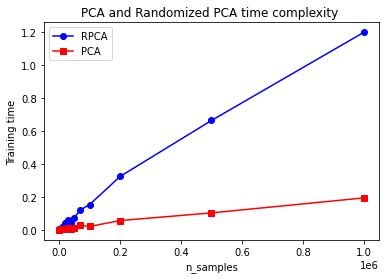

In [6]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000, 1000000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

In [ ]:
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000, 1000000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")